In [13]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import datetime
import time
from matplotlib.pyplot import figure

In [15]:
# Preview data
youtube_2018 = pd.read_csv("output/youtube2018.csv")
youtube_2018.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1,2017-12-30T20:15:11.000Z,"high school musical|""disney""|""high school musi...",2993235,135820,6207,19539,False,False,False,22,Sat,12/30/2017,20:15:11,2018
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10,2017-12-29T22:59:01.000Z,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020,97709,4748,14172,False,False,False,31,Fri,12/29/2017,22:59:01,2018
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25,2017-12-30T13:00:04.000Z,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942,69361,13150,18227,False,False,False,12,Sat,12/30/2017,13:00:04,2018
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15,2017-12-30T14:00:04.000Z,"the pet collective|""pet collective""|""the pet c...",277046,6878,265,389,False,False,False,26,Sat,12/30/2017,14:00:04,2018
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24,2017-12-30T18:00:01.000Z,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580,7512,451,562,False,False,False,30,Sat,12/30/2017,18:00:01,2018


In [16]:
# describe 2018 data
youtube_2018.describe()

,category_id,views,likes,dislikes,comment_count,tag_num,trending year
count,31349.000000,3.134900e+04,3.134900e+04,3.134900e+04,3.134900e+04,31349.000000,31349.0
mean,19.974959,2.686777e+06,8.245072e+04,3.922386e+03,9.255513e+03,19.988772,2018.0
std,7.570850,7.921209e+06,2.433361e+05,2.516193e+04,3.932741e+04,11.928691,0.0
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2018.0
25%,17.000000,3.173550e+05,7.268000e+03,2.630000e+02,7.700000e+02,10.000000,2018.0
50%,24.000000,8.289090e+05,2.149700e+04,7.540000e+02,2.193000e+03,20.000000,2018.0
75%,25.000000,2.121136e+06,6.393900e+04,2.260000e+03,6.710000e+03,29.000000,2018.0
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,69.000000,2018.0


In [9]:
youtube_2018.loc[youtube_2018['likes']==0]

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_dow,publish_date,publish_mhs,trending year
97,WIWb8f1WIyQ,01/01/18,PART 1 | Gwen Stefani with Blake Shelton | Ins...,Famous Celebrities Snaps,2.0,"famous|""celebrities""|""actor""|""actress""|""storie...",477976.0,0.0,0.0,777.0,https://i.ytimg.com/vi/WIWb8f1WIyQ/default.jpg,False,True,False,"Like, Share and Subscribe!",Mon,12/25/2017,03:08:33,2018.0
303,WIWb8f1WIyQ,01/02/18,PART 1 | Gwen Stefani with Blake Shelton | Ins...,Famous Celebrities Snaps,2.0,"famous|""celebrities""|""actor""|""actress""|""storie...",481619.0,0.0,0.0,774.0,https://i.ytimg.com/vi/WIWb8f1WIyQ/default.jpg,False,True,False,"Like, Share and Subscribe!",Mon,12/25/2017,03:08:33,2018.0
542,WIWb8f1WIyQ,01/03/18,PART 1 | Gwen Stefani with Blake Shelton | Ins...,Famous Celebrities Snaps,2.0,"famous|""celebrities""|""actor""|""actress""|""storie...",484743.0,0.0,0.0,789.0,https://i.ytimg.com/vi/WIWb8f1WIyQ/default.jpg,False,True,False,"Like, Share and Subscribe!",Mon,12/25/2017,03:08:33,2018.0
638,aBL027wEtg8,01/04/18,Mariah Carey - Live At Dick Clark's New Year's...,mariahxlambily,10.0,"Mariah|""Carey""|""Mariah Carey""|""Vocals""|""Vocal ...",1040440.0,0.0,0.0,4752.0,https://i.ytimg.com/vi/aBL027wEtg8/default.jpg,False,True,False,Instagram - @mxlambily\nTwitter - @mxlambily\n...,Mon,01/01/2018,05:30:01,2018.0
774,WIWb8f1WIyQ,01/04/18,PART 1 | Gwen Stefani with Blake Shelton | Ins...,Famous Celebrities Snaps,2.0,"famous|""celebrities""|""actor""|""actress""|""storie...",485534.0,0.0,0.0,784.0,https://i.ytimg.com/vi/WIWb8f1WIyQ/default.jpg,False,True,False,"Like, Share and Subscribe!",Mon,12/25/2017,03:08:33,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,UwbO_xb1-Xo,04/05/18,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22.0,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664.0,0.0,0.0,0.0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",Wed,03/21/2018,18:42:04,2018.0
18990,UwbO_xb1-Xo,04/06/18,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22.0,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731.0,0.0,0.0,0.0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",Wed,03/21/2018,18:42:04,2018.0
19194,9TUBf6l7FBg,04/14/18,Coachella 2018 LIVE Channel 1,Coachella,10.0,[none],3598220.0,0.0,0.0,0.0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,Thu,04/05/2018,06:48:28,2018.0
19395,9TUBf6l7FBg,04/15/18,Coachella 2018 LIVE Channel 1,Coachella,10.0,[none],11137071.0,0.0,0.0,2.0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,Thu,04/05/2018,06:48:28,2018.0


In [17]:
# Top 20 channels
youtube_2018["channel_title"].value_counts().head(20)

ESPN                                      158
TheEllenShow                              155
Jimmy Kimmel Live                         154
The Tonight Show Starring Jimmy Fallon    150
The Late Show with Stephen Colbert        150
Netflix                                   148
Vox                                       145
CNN                                       144
TED-Ed                                    142
NBA                                       137
Screen Junkies                            136
BuzzFeedVideo                             136
Late Night with Seth Meyers               135
Saturday Night Live                       131
WIRED                                     130
HellthyJunkFood                           129
INSIDER                                   128
Tasty                                     125
The Late Late Show with James Corden      124
Bon Appétit                               124
Name: channel_title, dtype: int64

In [18]:
#Using median as measure of central tendency due to distribution of data
print(f"Median Views: {int(youtube_2018['views'].median())}")
print(f"Median Likes: {int(youtube_2018['likes'].median())}")
print(f"Median Dislikes: {int(youtube_2018['dislikes'].median())}")
print(f"Median Comment Count: {int(youtube_2018['comment_count'].median())}")

Median Views: 828909
Median Likes: 21497
Median Dislikes: 754
Median Comment Count: 2193


In [19]:
dow_df = pd.DataFrame(youtube_2018['publish_dow'].value_counts())
dow_df = dow_df.rename(columns={"publish_dow": "Count"})
dow_df

,Count
Thu,5577
Fri,5436
Wed,4933
Tue,4919
Mon,4732
Sun,3050
Sat,2702


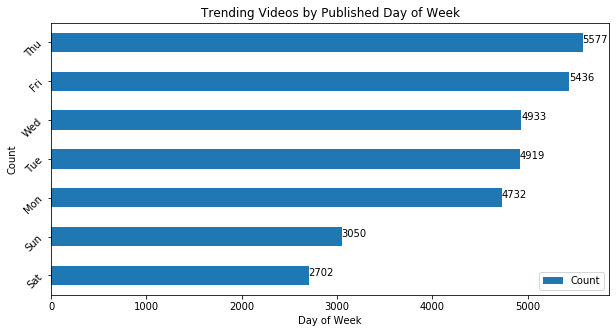

In [20]:
dow_df.plot.barh(rot=45)
plt.title("Trending Videos by Published Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= dow_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

In [21]:
# Total the counts of tags
tag_count_df = pd.DataFrame(youtube_2018['tag_num'].value_counts().head(10))
tag_count_df = tag_count_df.rename(columns={"tag_num": "Count"})
tag_count_df

,Count
1,1460
10,1155
4,1066
24,1042
25,1039
7,1027
30,947
13,933
27,896
9,895


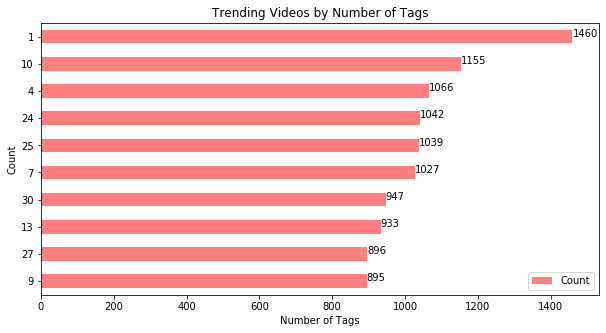

In [22]:
tag_count_df.plot.barh(color='r', alpha=0.5, rot=0)
plt.title("Trending Videos by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= tag_count_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

In [23]:
# Get total count per catefory and create DF
top5_categories = pd.DataFrame(youtube_2018['category_id'].value_counts())

top5_categories["id"] = ''
for index, row in top5_categories.iterrows():      
    top5_categories.loc[index, "id"] = index

top5_categories = top5_categories.sort_values(by=['id'])

In [24]:
# import category list from YouTube API as DF
category_list = pd.read_csv("output/YouTube_Categories.csv")
del category_list["Unnamed: 0"]
category_list = category_list.sort_values(by=['id'])

In [25]:
# merge df into one df
merged_category = pd.merge(top5_categories, category_list, on="id", how="left")
sorted_category = merged_category.sort_values(by=['category_id'], ascending=False)
sorted_category.rename(columns = {'category_id':'category_counts'}, inplace = True)
sorted_category = sorted_category[["id", "category","category_counts"]]
sorted_category.head()

,id,category,category_counts
9,24,Entertainment,7625
2,10,Music,4909
11,26,Howto & Style,3267
8,23,Comedy,2563
7,22,People & Blogs,2445


Text(0, 0.5, 'Count')

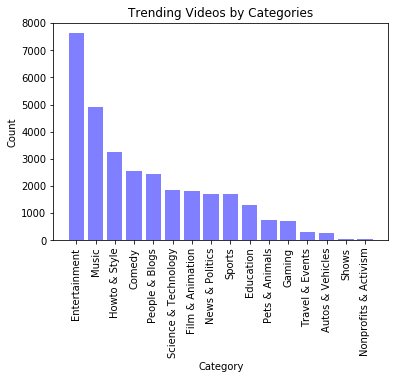

In [26]:
x = sorted_category["category"]
y = sorted_category["category_counts"]

tick_locations = [value for value in x]

plt.bar(x, y, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, sorted_category["category"], rotation="vertical")

plt.title("Trending Videos by Categories")
plt.xlabel("Category")
plt.ylabel("Count")